In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
dogs=pd.read_csv('dogs_dataset.csv')

In [3]:
dogs.shape

(3000, 5)

In [4]:
dogs.shape

(3000, 5)

In [5]:
dogs.dtypes

Breed          object
Age (Years)     int64
Weight (kg)     int64
Color          object
Gender         object
dtype: object

In [7]:
dogs.count() #NOT NULL VALUES

Breed          3000
Age (Years)    3000
Weight (kg)    3000
Color          3000
Gender         3000
dtype: int64

In [6]:
dogs.isnull().any()

Breed          False
Age (Years)    False
Weight (kg)    False
Color          False
Gender         False
dtype: bool

In [41]:
missing_values=dogs.isnull().sum()
print(missing_values)

Breed          0
Age (Years)    0
Weight (kg)    0
Color          0
Gender         0
dtype: int64


In [42]:
dogs_cleaned=dogs.dropna()

In [43]:
#replace null values with an estimate like mean,median etc
#dogs['Age (Years)'] = dogs['Age (Years)'].fillna(dogs['Age (Years)'].mean())


**DESCRIPTIVE STATISTICS: Breed,Age,Weight,Color,Gender.**

Analyse, total,top5, mean,avg,etc.


In [44]:
dogs['Breed'].value_counts()

Breed
Rottweiler                       118
French Bulldog                    70
Pekingese                         68
Pembroke Welsh Corgi              67
Doberman Pinscher                 66
Weimaraner                        66
Pug                               65
Bichon Frise                      64
Vizsla                            64
Cavalier King Charles Spaniel     64
Chinese Shar-Pei                  64
Poodle                            61
Whippet                           60
Dachshund                         59
Cocker Spaniel                    59
Bloodhound                        59
Border Collie                     57
Lhasa Apso                        56
Samoyed                           56
Bernese Mountain Dog              56
Alaskan Malamute                  55
Miniature Schnauzer               55
Jack Russell Terrier              55
Bulldog                           55
Airedale Terrier                  55
Dogo Argentino                    55
Irish Setter                    

In [45]:
dogs['Breed'].value_counts()[:5]

Breed
Rottweiler              118
French Bulldog           70
Pekingese                68
Pembroke Welsh Corgi     67
Doberman Pinscher        66
Name: count, dtype: int64

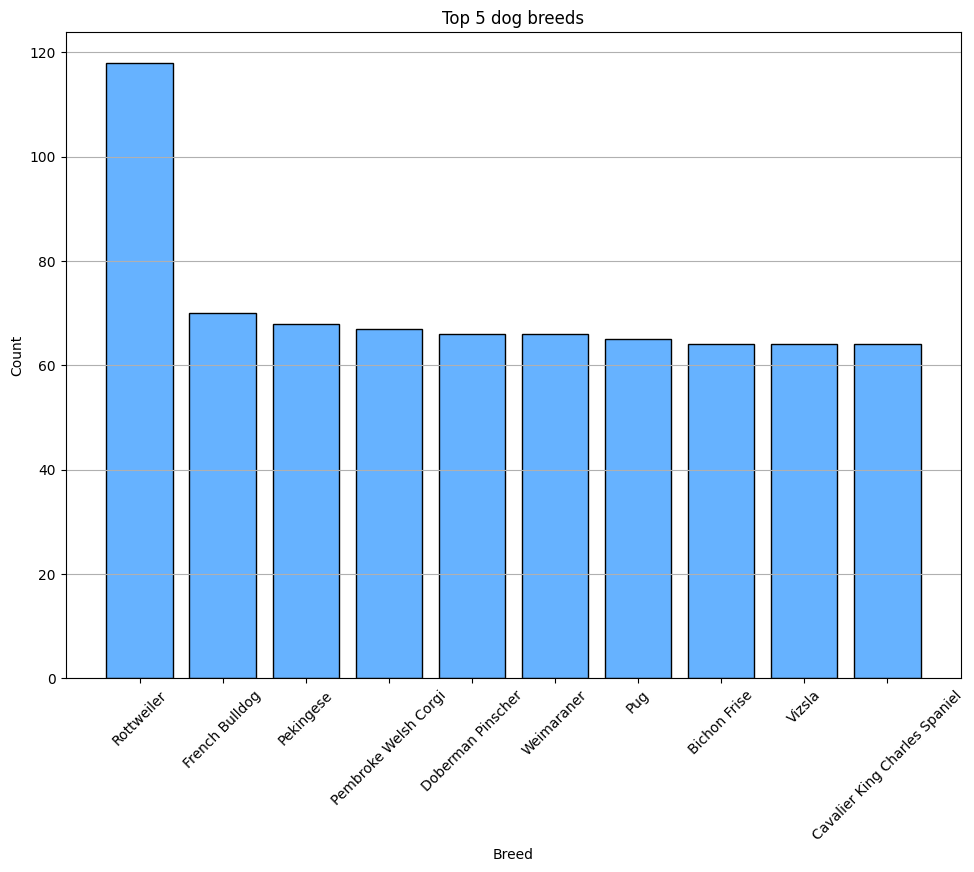

In [73]:
plt.figure(figsize=(10,7))
plt.bar(list(dogs['Breed'].value_counts().keys()[:10]),list(dogs['Breed'].value_counts()[:10]),color='#66B2FF',edgecolor='black')
plt.tight_layout()
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45) #for better visiblity
plt.title('Top 5 dog breeds')
plt.grid(axis='y') #for grid lines
plt.show()

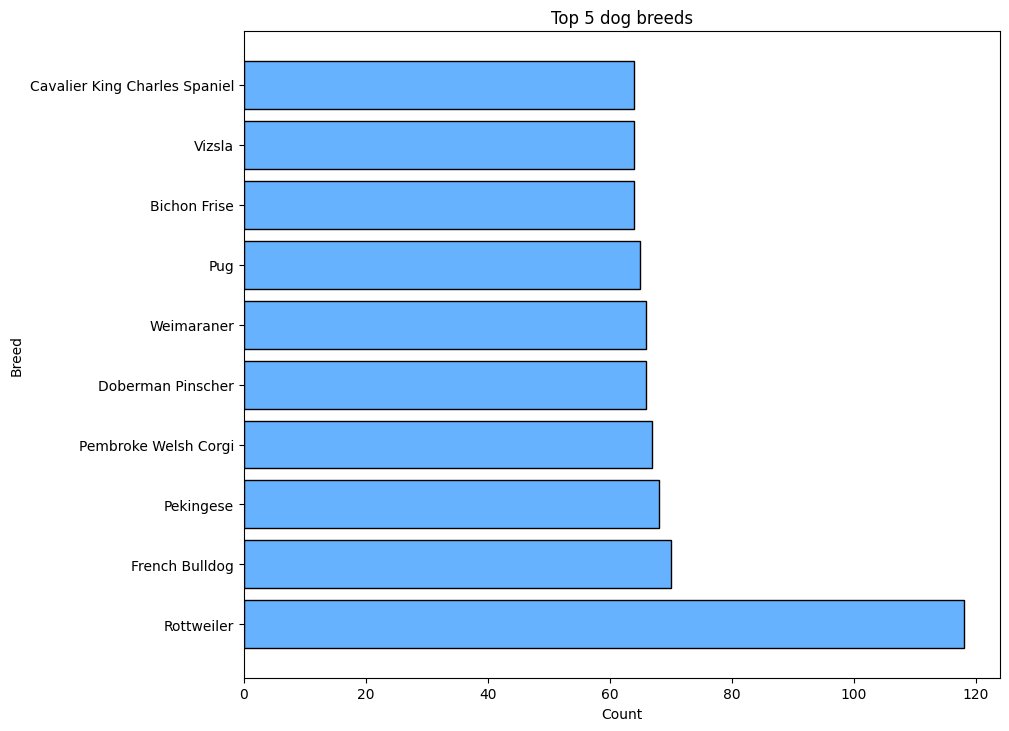

In [47]:
#barh for horizontal bar

plt.figure(figsize=(10,7))
plt.barh(list(dogs['Breed'].value_counts().keys()[:10]),list(dogs['Breed'].value_counts()[:10]),color='#66B2FF',edgecolor='black')
plt.tight_layout()
plt.ylabel('Breed')
plt.xlabel('Count')
#plt.xticks(rotation=45) #for better visiblity
plt.title('Top 5 dog breeds')
plt.show()

In [81]:
gender_counts=dogs.Gender.value_counts()
print(gender_counts)

Gender
Female    1520
Male      1480
Name: count, dtype: int64


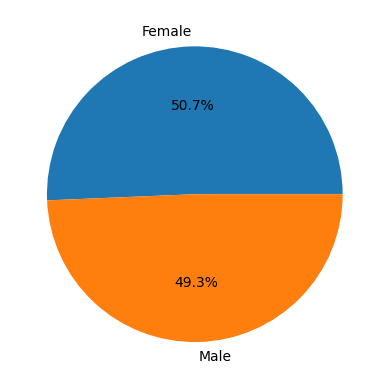

In [83]:
plt.pie(dogs['Gender'].value_counts(),labels=dogs['Gender'].value_counts().keys(),autopct='%0.1f%%')
plt.show()


In [49]:
dogs.Color.value_counts()[:5]

Color
Black and White    205
Bicolor            200
Brindle            200
Merle              199
Sable              199
Name: count, dtype: int64

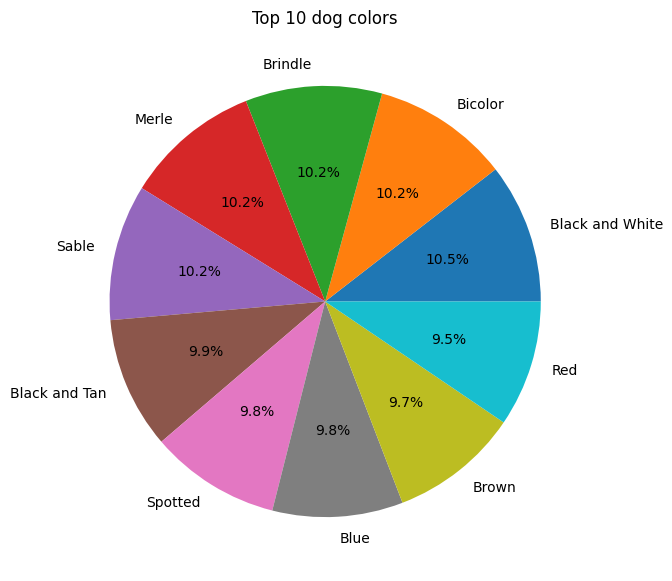

In [50]:
#Top 10 dog colors pie chart

plt.figure(figsize=(7,7))
plt.pie(list(dogs.Color.value_counts()[:10]),labels=list(dogs.Color.value_counts().index[:10]),autopct='%0.1f%%')
plt.title('Top 10 dog colors')
plt.show()

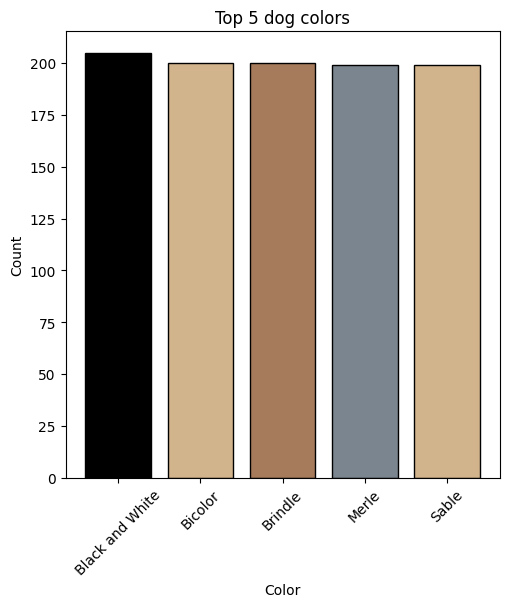

In [51]:
#to 5 dog colors bar chart
plt.figure(figsize=(5,5))
plt.bar(list(dogs['Color'].value_counts().keys()[:5]),list(dogs['Color'].value_counts()[:5]),color=['#000000','#D2B48C','#A67B5B','#7B858F','#D2B48C'],edgecolor='black')
plt.tight_layout()
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45) #for better visiblity
plt.title('Top 5 dog colors')
plt.show()

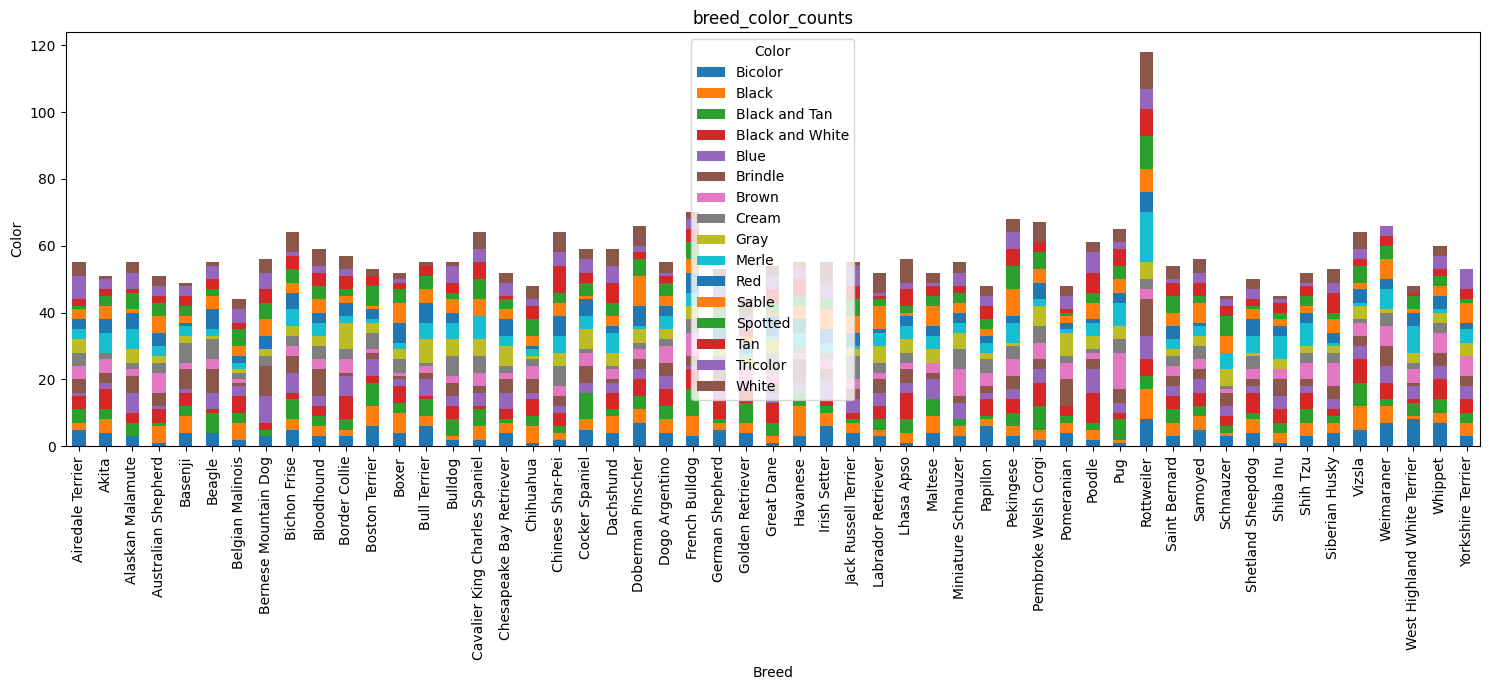

In [52]:
#breed and color of dogs in stacked bar
breed_color_counts=dogs.groupby(['Breed','Color'])['Color'].count().unstack().fillna(0)

breed_color_counts.plot(kind='bar',stacked=True, figsize=(15,7))
plt.xlabel('Breed')
plt.ylabel('Color')
plt.title('breed_color_counts')
plt.legend(title='Color')
plt.tight_layout()

plt.xticks(rotation=90)
plt.show()


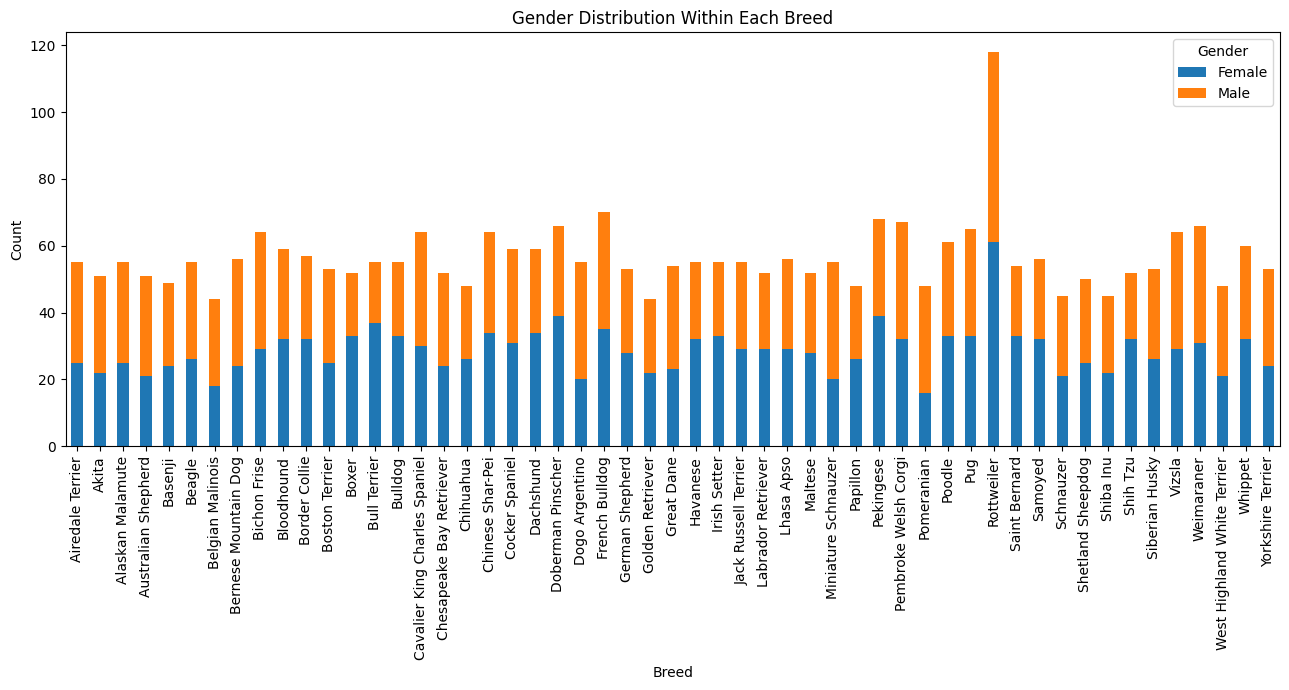

In [53]:
# GENDER AND BREED STACKED BAR CHART
breed_gender_counts = dogs.groupby(['Breed', 'Gender'])['Gender'].count().unstack().fillna(0)

breed_gender_counts.plot(kind='bar', stacked=True,figsize=(13, 7))
plt.xlabel('Breed')
plt.ylabel('Count')
plt.title('Gender Distribution Within Each Breed')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

**I think for color VS gender some other plot like scatter could be used.**


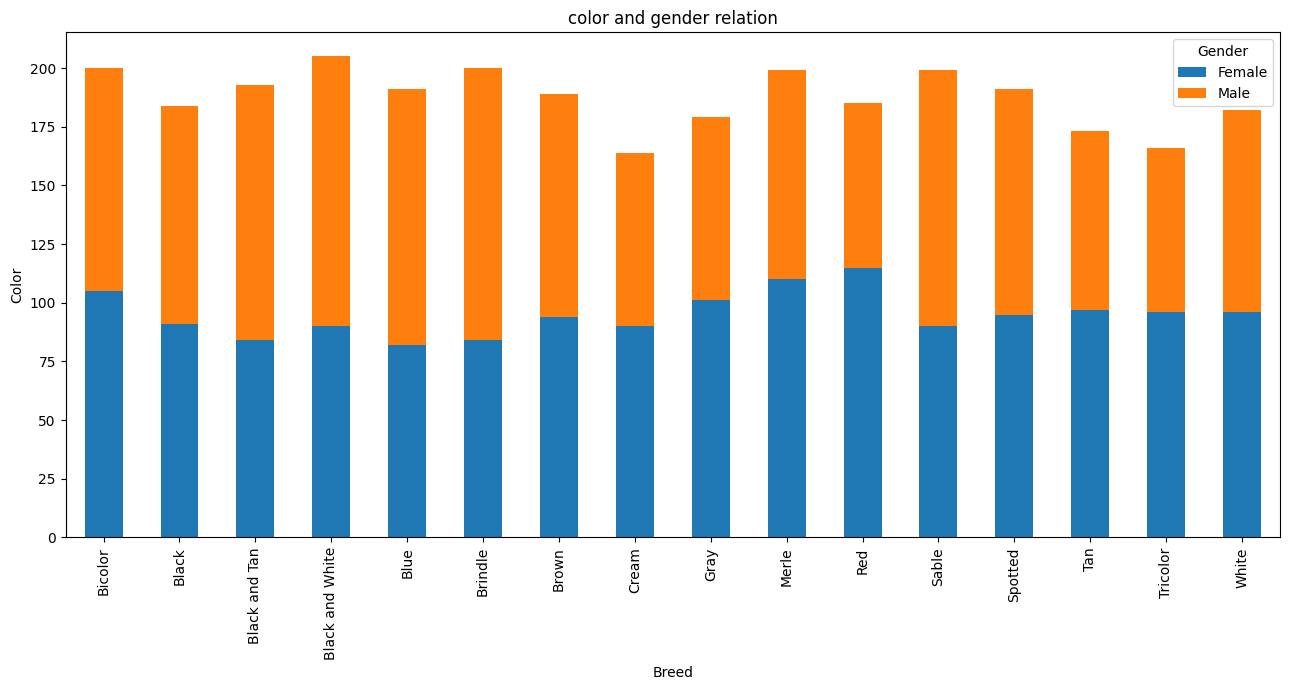

In [76]:
color_gender_counts = dogs.groupby(['Color', 'Gender'])['Gender'].count().unstack().fillna(0)

color_gender_counts.plot(kind='bar', stacked=True,figsize=(13, 7))
plt.xlabel('Breed')
plt.ylabel('Color')
plt.title('color and gender relation')
plt.xticks(rotation=90)
plt.legend(title='Gender')
#plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [55]:
print(dogs.describe())

       Age (Years)  Weight (kg)
count  3000.000000  3000.000000
mean      7.499000    32.059667
std       4.011238    15.628463
min       1.000000     5.000000
25%       4.000000    19.000000
50%       8.000000    33.000000
75%      11.000000    45.000000
max      14.000000    59.000000


<Axes: xlabel='Weight (kg)'>

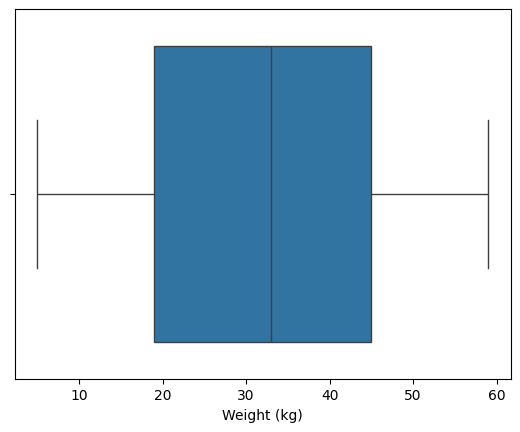

In [56]:
sns.boxplot(x=dogs['Weight (kg)'])


In [57]:
dogs['Age (Years)'].describe()

count    3000.000000
mean        7.499000
std         4.011238
min         1.000000
25%         4.000000
50%         8.000000
75%        11.000000
max        14.000000
Name: Age (Years), dtype: float64

In [58]:
dogs['Weight (kg)'].describe()

count    3000.000000
mean       32.059667
std        15.628463
min         5.000000
25%        19.000000
50%        33.000000
75%        45.000000
max        59.000000
Name: Weight (kg), dtype: float64

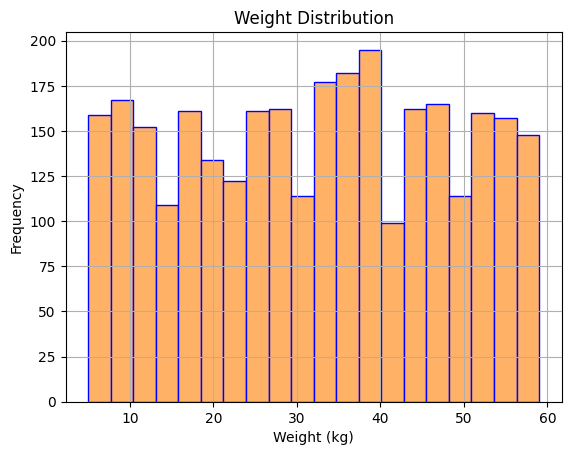

In [69]:
plt.hist(dogs['Weight (kg)'],bins=20,color='#FFB266',edgecolor='BLUE')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('Weight Distribution')
plt.grid(True)
plt.show()

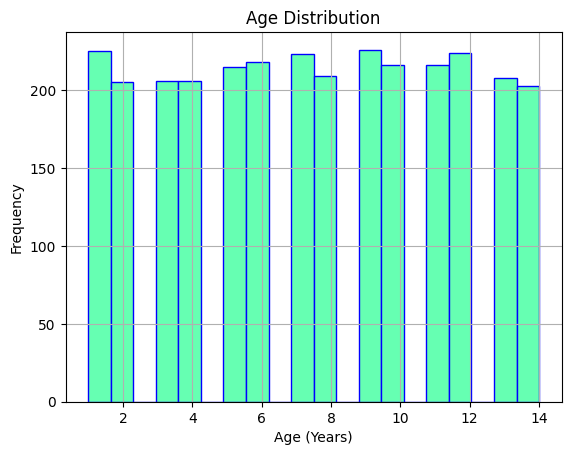

In [72]:
plt.hist(dogs['Age (Years)'],color='#66FFB2',edgecolor='blue',bins=20)
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

In [61]:
dogs[dogs['Gender']=='Female']['Weight (kg)'].mean()

31.90328947368421

In [62]:
dogs[dogs['Gender']=='Male']['Weight (kg)'].mean()


32.22027027027027

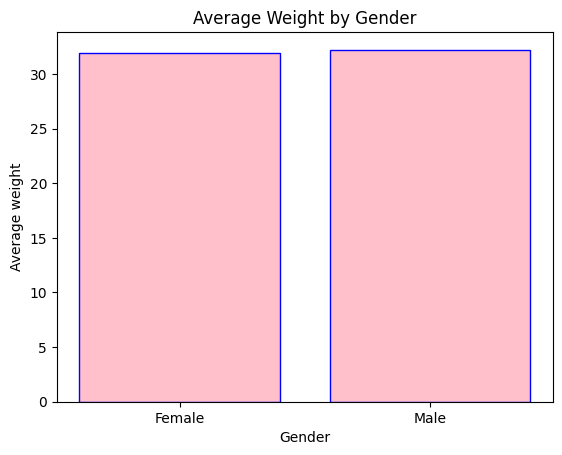

In [63]:
female_avg_weight=dogs[dogs['Gender']=='Female']['Weight (kg)'].mean()

male_avg_weight=dogs[dogs['Gender']=='Male']['Weight (kg)'].mean()

plt.bar(['Female', 'Male'],[female_avg_weight,male_avg_weight],color='pink',edgecolor='blue')

plt.xlabel('Gender')
plt.ylabel('Average weight')
plt.title('Average Weight by Gender')
plt.show()
# female is 31.90 and male is 32.22 which is almost the same

-0.0031079952483417566


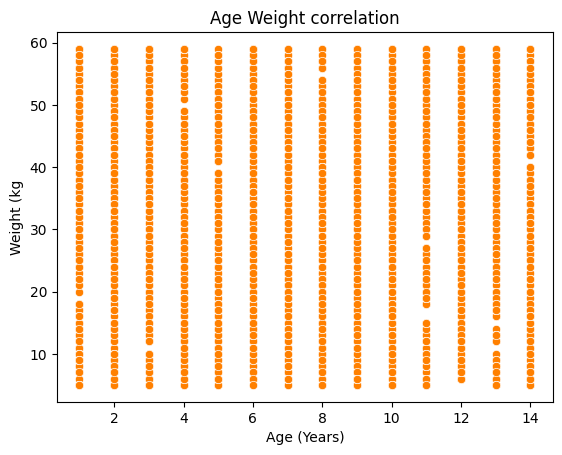

In [79]:
correlation=dogs['Age (Years)'].corr(dogs['Weight (kg)'])
print(correlation)
sns.scatterplot(x='Age (Years)',y='Weight (kg)',data=dogs,color='#FF8000')
plt.xlabel('Age (Years)')
plt.ylabel('Weight (kg')
plt.title("Age Weight correlation")
plt.show()
#the correlation is -0.0 hence no strong relationship.
#No Clear Trend